In [1]:
# -----------------------------------------------------------------------------
# Multiple linear regression 
# Monika Rogoziniene
# STUDENT NUMBER: 2334768
# -----------------------------------------------------------------------------


In [3]:
import pandas as pd #A library for data manipulation and analysis
import numpy as np # A library for numerical computations helps with mathematical operations.
import seaborn as sd #A library helps creating graphics.

from sklearn.model_selection import train_test_split #scikit-learn splitting datasets into training and testing sets for machine learning.
from sklearn.linear_model import LinearRegression #It is a statistical method for predicting a dependent variable based on one or more independent variables PARLAK, B.O. and YAVAŞOĞLU (2023).
import matplotlib.pyplot as plt #library for creating  visualizations
from pandas.plotting import scatter_matrix #Generate scatter plot matrices, which visualize relationships between numerical variables in a data frame.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import matplotlib.pyplot as plt
import os # file and directory operations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [5]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [7]:
dataset

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,0,219.0
1,45,male,yes,64,121/72,0,248.0
2,58,male,yes,81,127.5/76,0,235.0
3,42,male,yes,90,122.5/80,0,225.0
4,42,male,yes,62,119/80,0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60,254.0
3896,49,male,yes,70,123/75,60,213.0
3897,56,male,yes,70,125/79,60,246.0
3898,50,male,yes,85,134/95,60,340.0


In [9]:
dataset = dataset.fillna(0)
if 'sex' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['sex'])
if 'current_smoker' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['current_smoker'])

In [11]:
dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})
dataset['current_smoker_no'] = dataset['current_smoker_no'].replace({True: 1, False: 0})
dataset['current_smoker_yes'] = dataset['current_smoker_yes'].replace({True: 1, False: 0})

In [13]:

if 'blood_pressure' in dataset.columns:
    dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
    dataset = dataset.drop(['blood_pressure'], axis=1)

dataset

,age,heart_rate,cigs_per_day,chol,sex_female,sex_male,current_smoker_no,current_smoker_yes,blood_pressure_systolic,blood_pressure_diastolic
0,54,95,0,219.0,0,1,0,1,110,72
1,45,64,0,248.0,0,1,0,1,121,72
2,58,81,0,235.0,0,1,0,1,127.5,76
3,42,90,0,225.0,0,1,0,1,122.5,80
4,42,62,0,226.0,0,1,0,1,119,80
...,...,...,...,...,...,...,...,...,...,...
3895,37,88,60,254.0,0,1,0,1,122.5,82.5
3896,49,70,60,213.0,0,1,0,1,123,75
3897,56,70,60,246.0,0,1,0,1,125,79
3898,50,85,60,340.0,0,1,0,1,134,95


In [15]:
#X = dataset[['age', 'sex', 'current_smoker', 'heart_rate', 'cigs_per_day', 'blood_pressure_systolic', 'blood_pressure_diastolic']]
X = dataset[["age", "sex_female", "sex_male", "current_smoker_no",	"current_smoker_yes", "heart_rate", "cigs_per_day", "blood_pressure_systolic", "blood_pressure_diastolic"]]
Y = dataset['chol']

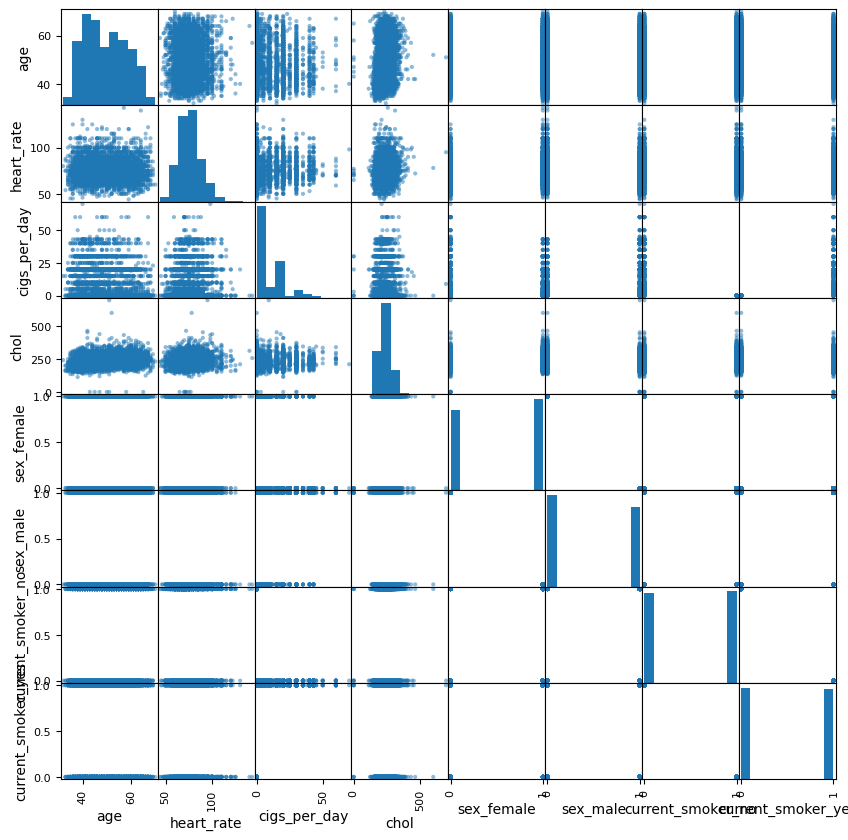

In [17]:
numerical_columns = dataset.select_dtypes(include=[np.number])
scatter_matrix(numerical_columns, figsize=(10, 10))
plt.show()

In [ ]:
sd.pairplot(dataset, hue = 'chol')

C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmerk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [ ]:
Y

In [ ]:
X

In [ ]:
test_size1 = 0.2
random_state1 = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1, random_state=random_state1 )
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
#random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#test_size1 = [0.2, 0.3, 0.5]

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


In [ ]:
#simple linear regression Y = mX+c
#Multiple linear regression Y = m1X1+m2X2+m3X3 ... +mnXn+c

In [ ]:
c = regressor.intercept_

In [31]:
c

121.98338942794219

In [33]:
m = regressor.coef_

In [35]:
m

array([ 1.19941205,  4.50598756, -4.50598756,  0.56703872, -0.56703872,
        0.19561294,  0.21100489,  0.06743475,  0.34104203])

In [37]:
Y_pred_train = regressor.predict(X_train)

In [39]:
Y_pred_train

array([215.07327266, 246.96535787, 227.30694261, ..., 222.95076251,
       242.49815623, 247.11552913])

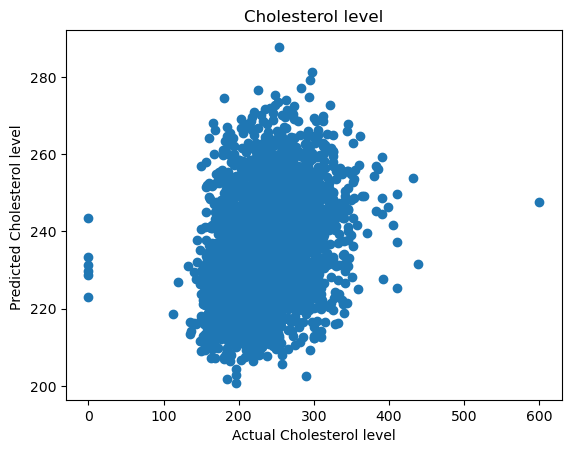

In [41]:
plt.scatter(Y_train, Y_pred_train)
plt.title("Cholesterol level")
plt.xlabel("Actual Cholesterol level")
plt.ylabel("Predicted Cholesterol level ")


plt.show()

In [43]:
predicted = regressor.predict(X_test)


In [45]:
Y_pred_test = regressor.predict(X_test)

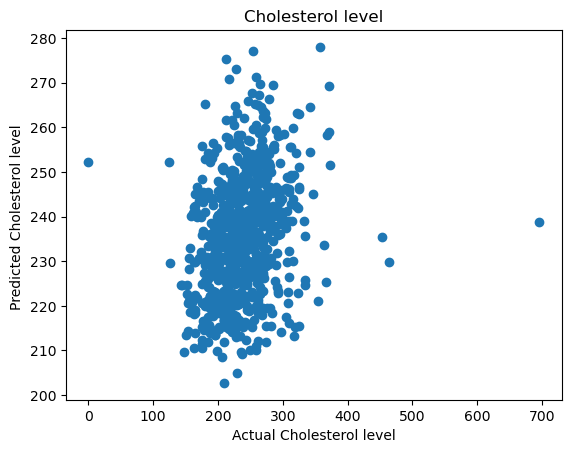

In [47]:
plt.scatter(Y_test, Y_pred_test)
plt.title("Cholesterol level")
plt.xlabel("Actual Cholesterol level")
plt.ylabel("Predicted Cholesterol level ")
plt.show()

In [49]:
mse = mean_squared_error(Y_test, Y_pred_test)
mae = mean_absolute_error(Y_test, Y_pred_test) 
r2 = r2_score(Y_test, Y_pred_test)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 2008.4161
Mean Absolute Error: 31.8877
R-squared: 0.0721


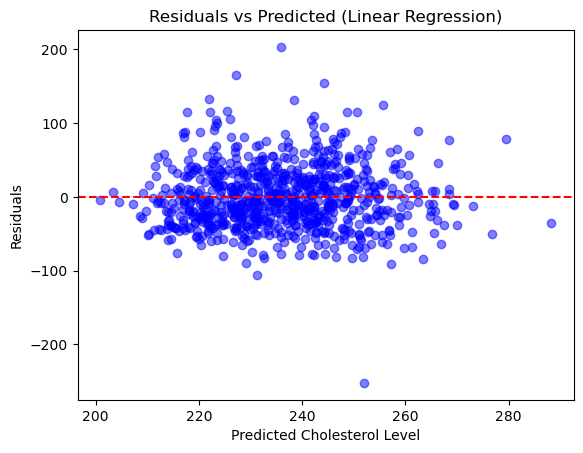

In [55]:
# Residuals for Linear Regression
residuals_lr = Y_test - Y_pred_test
plt.scatter(Y_pred_test, residuals_lr, color="blue", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Linear Regression)")
plt.xlabel("Predicted Cholesterol Level")
plt.ylabel("Residuals")
plt.show()


In [57]:
'''difference between the actual values and the predicted values
Around Zero: It means that the errors are relatively small and
centered around zero, which shows that the model's predictions are not consistently too high or too low.
It seems that there are some data points that are significantly above or below the zero line, 
which suggests that there may be outliers in your data. These data points represent cholesterol
levels that are much higher or lower than what the model predicted.'''

"difference between the actual values and the predicted values\nAround Zero: It means that the errors are relatively small and\ncentered around zero, which shows that the model's predictions are not consistently too high or too low.\nIt seems that there are some data points that are significantly above or below the zero line, \nwhich suggests that there may be outliers in your data. These data points represent cholesterol\nlevels that are much higher or lower than what the model predicted."

In [59]:
dataset = {
    "Test_Size": test_size1,
    "Random_state": random_state1,
    "MSE": [mse],
    "MAE": [mae],
    "R2": [r2],


}

In [61]:
df = pd.DataFrame(dataset)
csv_file = "Multiple_linear-regression.csv"
if not os.path.isfile(csv_file):
    df.to_csv(csv_file, mode='a', header=True, index=False)
else:
    df.to_csv(csv_file, mode='a', header=False, index=False)
    print("Data move csv file") 

Data move csv file


In [65]:

#Referencing
#PARLAK, B.O. and YAVAŞOĞLU, H.A. (2023). Comparison of Regression Algorithms to Predict Average Air Temperature. Uluslararası Muhendislik Arastirma ve Gelistirme Dergisi, 15(1), pp.312–322. doi:https://doi.org/10.29137/umagd.1232020.

